# Act Report- WeRateDogs Twitter Data
> **Mariam Garuba**

![image](act_dog.jpg)
### Gathering Data
The project gathers three pieces of data as described below:

- Twitter archive file: This can be downloaded manually via [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) and read into a pandas DataFrame.

- The tweet image predictions: This is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: [tweet_image_predictions](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv). The results is a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponds to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

- tweet's JSON data should be written to its own line. Then read line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 
______

## Assessing Data
After gathering all three pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues.

You need to use two types of assessment:

- Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
- Programmatic assessment: pandas' functions and/or methods are used to assess the data.
________

### Quality

>#### twitter_archive table
>1. Remove the leading html tags from the `source` column.
>2. Remove records that are retweeted and replied.
>3. drop columns with null values.
>4. convert datatypes of `timestamp` and `tweet_id` columns
>5. non-dog names in `name` column 
>6. drop null values in the `expanded_urls` column
>7. extract the ratings from `text` column 
>8. extract correct values for `rating_numerator` and `rating_denominator` 
>9. change `rating_numerator` datatype to float 
>10  change `rating_denominator` datatype to int

________


### Tidiness  
>1. Melt the `doggo`, `floofer`, `pupper` and `puppo` columns as dog_stages column.
>2. merge the three tables as one and drop all duplicated rows.
_______

## Cleaning Data

>- Before you perform the cleaning, you will make a copy of the original data.
>- Clean all of the issues you documented while assessing.
>- During cleaning, use the **define-code-test framework** and clearly document it.
>- Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality >and tidy master pandas DataFrame (or DataFrames, if appropriate).
_______

## Storing Data
> **save the gathered, assessed and cleaned master datasets to a csv file named twitter_achive_master.csv**
## Analyzing and Visualizing Data
### Questions:
>1. Does the numerator rating influence the favorite and retweet count?

>2. What is the correlation between the favorite and retweet count?

>3. Does the number of images Does the number of images improve the vote count of tweets on a yearly bases?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('twitter_achive_master.csv')

In [3]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0


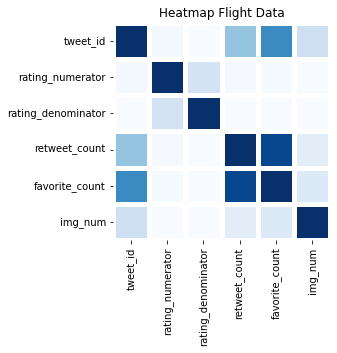

In [4]:
sns.heatmap(df.corr(), cbar=0, linewidths=5,vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap Flight Data")
plt.show()

### Insights
- There is a positive correlation of 0.91 between the favorite count and retweet count variables. However, the numerator and denominator rating variables show minimal relationships.
- Mean demoninator votes above 10 have significantly higher favorite and retweet counts.
- Uploading more images does not ultimately lead to better engagement, as posts with 3 images express a decline in favorite and retweet counts.